# Data Visualization with Modern Data Science

> Introduction

Yao-Jen Kuo <yaojenkuo@ntu.edu.tw> from [DATAINPOINT](https://www.datainpoint.com)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ks2022 import KaggleSurvey2022

## Welcome to Data Visualization with Modern Data Science 2023

![](https://i.imgur.com/wbs8iww.png)

## What is data visualization

## The definition

> Visualization is a tool that addresses the gap between data, function, formula, and viewers. Effective visualizations transform abstract collections of numbers into shapes that viewers quickly grasp and understand.

Source: [Data Visualization with JavaScript](https://www.amazon.com/Data-Visualization-JavaScript-Stephen-Thomas-ebook/dp/B00V20IFDG)

## Why visualization

- Data in raw format is abstract to human.
- Data represented with formula is abstract to human.

In [2]:
x = np.linspace(0, 2*np.pi)
f = np.sin(x)

## Some abstract $x$ and $f(x)$

In [3]:
print(x)
print(f)

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]
[ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  6.40702200e-02 -6.40702200e-02 -1.91158629e-01 -

## $f(x)=sin(x), \text{where } 0 \leq x \leq 2\pi$

In [4]:
def plot_sinx(x_arr, y_arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y_arr)
    ax.set_xticks([0, np.pi, 2*np.pi])
    ax.set_xticklabels(['$0$', '$\pi$', '$2\pi$'])
    ax.set_yticks([-1, 0, 1])
    ax.set_yticklabels(['$-1$', '$0$', '$1$'])
    ax.set_title('$f(x)=sin(x)$')
    plt.show()

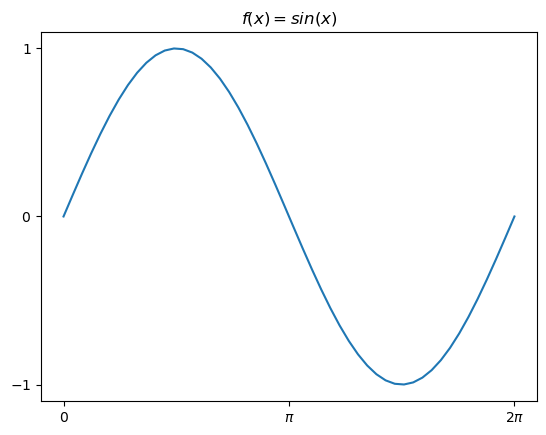

In [5]:
plot_sinx(x, f)

## An abstract formula

$$S(x) = \frac{1}{1 + e^{-x}}$$

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_sigmoid(x_arr, y_arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y_arr)
    ax.set_yticks([0, 0.5, 1])
    ax.set_xticks([])
    ax.set_title('$S(x) = 1/(1+e^{-x})$')
    plt.show()

x = np.linspace(-10, 10)
S = sigmoid(x)

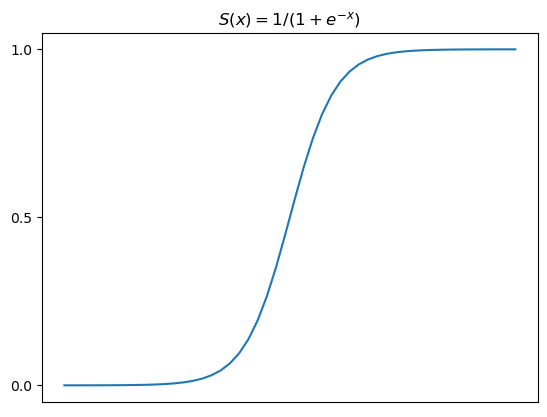

In [7]:
plot_sigmoid(x, S)

## Visualization also plays a key role in machine learning

Yet, another abstract formula.

\begin{equation}
J(\theta) = -ylog \big( h_{\theta}(X) \big) - (1-y)log \big( 1 - h_{\theta}(X) \big)
\end{equation}

## Machine learning engineer uses line plot to visualize cost function

In [8]:
def plot_cross_entropy(x_arr):
    y0 = -np.log(1-x_arr)
    y1 = -np.log(x_arr)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y0, label="$-log(1 - h_{\\theta}(X))$ if y = 0")
    ax.plot(x_arr, y1, label="$-log(h_{\\theta}(X))$ if y = 1")
    ax.legend()
    ax.set_title("Cross Entropy")
    ax.set_xlabel("$h_{\\theta}(X)$")
    ax.set_ylabel("Cost")
    plt.show()
    
x = np.linspace(0.0001, 0.9999, 1000)

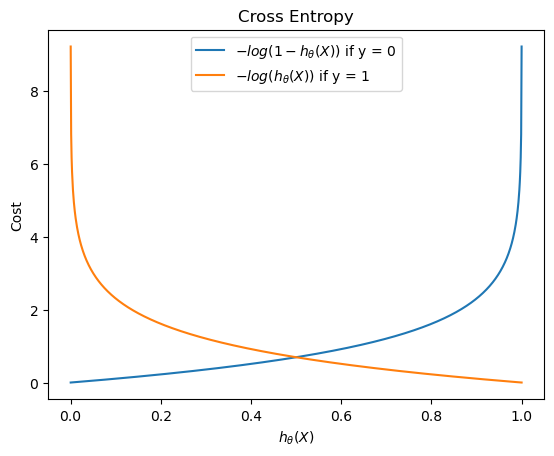

In [9]:
plot_cross_entropy(x)

## Machine learning engineer uses surface plot to visualize gradients

![Imgur](https://i.imgur.com/qMsNwXx.png)

Source: [Coursera | Machine Learning](https://www.coursera.org/learn/machine-learning)

## Machine learning engineer also uses contour plot to visualize gradients

![Imgur](https://i.imgur.com/qmeRAdf.png)

Source: [Coursera | Machine Learning](https://www.coursera.org/learn/machine-learning)

## Machine learning engineer uses scatter plot and contour plot to visualize decision boundary

Source: <https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py>

In [10]:
from itertools import product
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

def plot_multiple_decision_boundary():
    # Loading some example data
    iris = datasets.load_iris()
    X = iris.data[:, [0, 2]]
    y = iris.target

    # Training classifiers
    clf1 = DecisionTreeClassifier(max_depth=4)
    clf2 = KNeighborsClassifier(n_neighbors=7)
    clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
    eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                        ('svc', clf3)],
                            voting='soft', weights=[2, 1, 2])

    clf1.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    eclf.fit(X, y)

    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

    for idx, clf, tt in zip(product([0, 1], [0, 1]),
                            [clf1, clf2, clf3, eclf],
                            ['Decision Tree (depth=4)', 'KNN (k=7)',
                             'Kernel SVM', 'Soft Voting']):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                      s=20, edgecolor='k')
        axarr[idx[0], idx[1]].set_title(tt)

    plt.show()

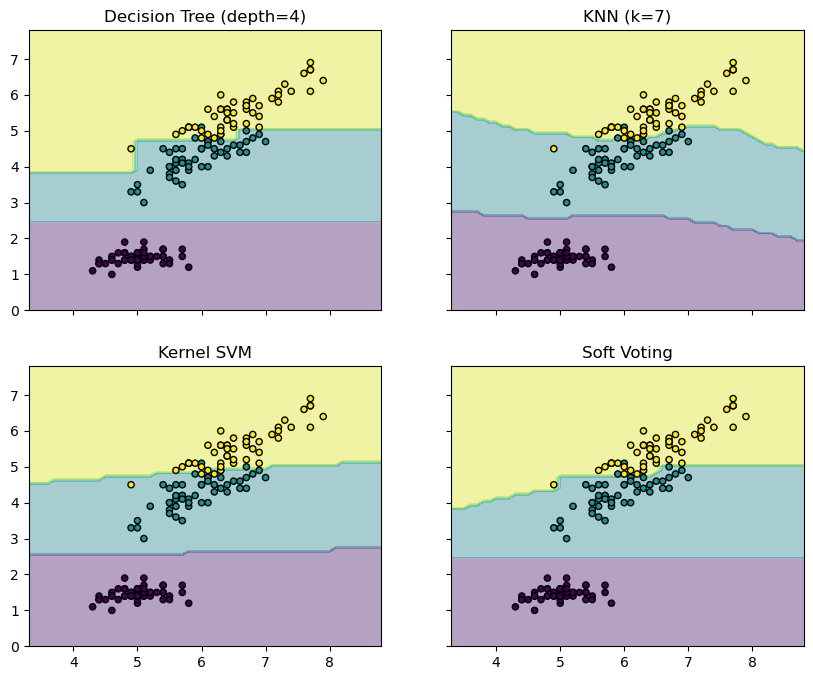

In [11]:
plot_multiple_decision_boundary()

## The 2 most influential visualizations of ALL TIME

1. [Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Flow_map#/media/File:Minard.png)
2. [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo)

## [Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Flow_map#/media/File:Minard.png)

In 1812, Napoleon marched to Moscow. 98% of his soldiers died. The simple but fascinating temperature line below the viz shows how cold ultimately defeated Napoleon’s army.

![Imgur](https://i.imgur.com/DcuAxgz.png?1)

## [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo)

A 2007 TED talk for the Swedish scientist shared his passion with the world. It shows the relationship between wealth and health.

![Imgur](https://i.imgur.com/IiDf3I8.png?1)

## John Tukey is an American mathematician best known for development of box plot

>The simple graph has brought more information to the data analyst’s mind than any other device.
>
>[John Tukey](https://en.wikipedia.org/wiki/John_Tukey)

## What is modern data science

## The definition

> Modern data science is a huge field, it invovles applications and tools like importing, tidying, transformation, visualization, modeling, and communication. Surrounding all these is programming.

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## Yet, modern data science is quickly becoming a common skill in office work

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## Import, tidy, and transform together called "wrangle"

![](https://i.imgur.com/iI7YT4x.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## "Wrangle"

![](https://media.giphy.com/media/MnlZWRFHR4xruE4N2Z/giphy.gif)

Source: <https://media.giphy.com/media/MnlZWRFHR4xruE4N2Z/giphy.gif>

## Who is a data scientist/What is data science

![Imgur](https://i.imgur.com/vbczHMF.jpg)

Source: <https://twitter.com/cdixon/status/428914681911070720/photo/1>

## Data scientist's appearance on TV show back in the 1990s

![Imgur](https://i.imgur.com/QhZ2FDY.png?2)

Source: <https://www.warnerbros.com/tv/friends>

![Imgur](https://i.imgur.com/iZwdP9t.png?5)

Source: <https://www.warnerbros.com/tv/friends>

## What is data science

![Imgur](https://i.imgur.com/6u4tw97.png)

Source: Drew Conway

## Tools we're gonna use in this course

## A little bit of ...

- Tableau for **visualization** and **communication**.
- SQL for **importing** and **tidying**.
- Python for **importing**, **tidying**, and **transformation**.

## In fact, scientific programming languages including R, Matlab, or Julia, ...etc. are capable of tackling everything

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## Why Tableau, SQL, and Python?

The following plots speak loud and clear.

## Let's explore 2 questions in [2022 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2022)

- Q12: What programming languages do you use on a regular basis? (Select all that apply)
- Q36: Do you use any of the following business intelligence tools? (Select all that apply)

In [12]:
csv_file = "https://raw.githubusercontent.com/datainpoint/classroom-data-viz-with-modern-ds-2023/main/data/kaggle_survey_2022_responses.csv"
ks = KaggleSurvey2022(csv_file)

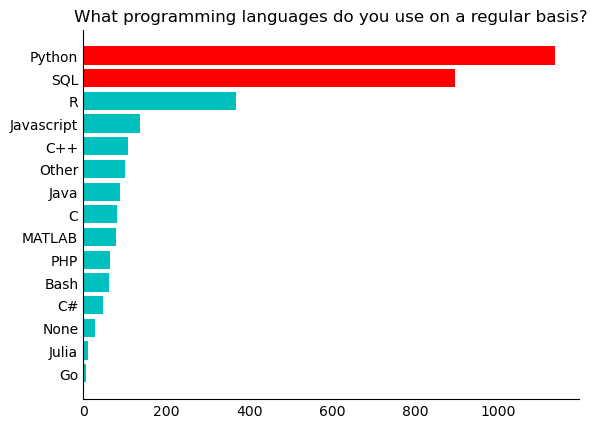

In [13]:
ks.plot_survey_summary(question_index="Q12", n=2)

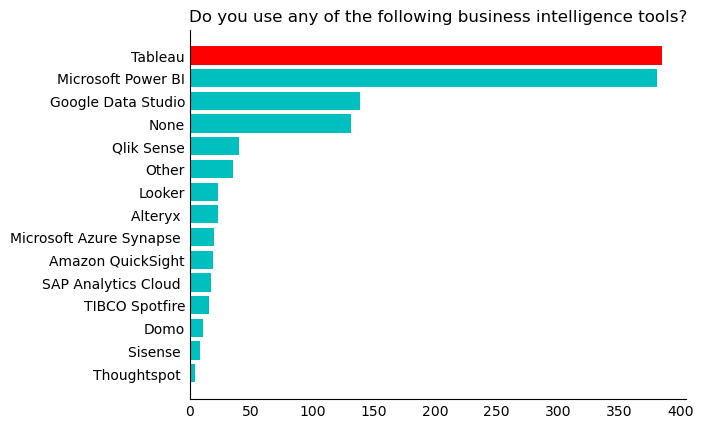

In [14]:
ks.plot_survey_summary(question_index="Q36", n=1)

## Topics covered in this course

Level of Difficulty: **Easy**.

- Getting started with Tableau.
- Creating Dashboards with Tableau.
- Getting started with SQL.
- Querying data with SQL.
- Data manipulation and definition with SQL.
- Getting started with Python.
- Conditionals and iterations in Python.
- Writing functions with Python.
- Array computing with NumPy.
- Data wrangling with Pandas: Part 1.
- Data wrangling with Pandas: Part 2.
- Data visualization with Python.